In [1]:
import sys
sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
%matplotlib inline

In [2]:
import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter
from new_train import train_nis
from new_train import train_nisp_rnis
from nis_net import NISNet
from nis_net import NISPNet
from nis_net import RNISNet
from datetime import datetime
from new_sir import SIRModel
t0 = datetime.now()


use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0') if use_cuda else torch.device('cpu')
device

device(type='cuda', index=0)

# Generate data

In [3]:
mul_batch_size = [0,5000,3000,1000]#[0,10,4500,1500]
sigma = 0.03
rou = -0.5
steps = 7
dt = 0.01

seed = 2050
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
sir_train = SIRModel(size_list=[9000], beta=1, gamma=0.5, steps=7, dt=0.01, interval=1, sigma=0.01, rho=-0.5)
train_data = [torch.FloatTensor(sir_train.sir_input).to(device), torch.FloatTensor(sir_train.sir_output).to(device)]
sir_test = SIRModel(size_list=[1000], beta=1, gamma=0.5, steps=7, dt=0.01, interval=1, sigma=0.05, rho=-0.5)
test_data = [torch.FloatTensor(sir_test.sir_input).to(device), torch.FloatTensor(sir_test.sir_output).to(device)]

# Train RNIS

In [4]:
sz = 4
scale = 2
T_total = 30001
hidden_units = 64
batch_size = 128
net_rnis = RNISNet(input_size=sz, latent_size=scale, output_size=sz, 
                        hidden_units=hidden_units, hidden_units_dyn=32,
                        is_normalized=True)
trainer = train_nisp_rnis(net=net_rnis, data=train_data, data_test=test_data, device=device)
trainer.training(T1=3000, T_all=T_total, mae2_w=1, batch_size=batch_size, clip=200)
eis_rnis, term1s_rnis, term2s_rnis, losses_rnis_train, losses_rnis_test = trainer.return_log()
param_counts_rnis = trainer.param_counts

check point------step-> 10:32:26.678855; lasting 0:00:34.965405 seconds
Epoch: 0
Train loss: 0.0024
Train loss: 0.4621
dEI: 0.6276
term1: -0.3310
term2: 1.5861
------------------------------------------------------------------------------------------------------------------------
check point------step-> 10:32:36.034506; lasting 0:00:09.355651 seconds
Epoch: 200
Train loss: 0.3273
Train loss: 0.2345
dEI: 0.8199
term1: 0.0100
term2: 1.6299
------------------------------------------------------------------------------------------------------------------------
check point------step-> 10:32:45.533510; lasting 0:00:09.499004 seconds
Epoch: 400
Train loss: 0.1625
Train loss: 0.1522
dEI: 1.0232
term1: 0.2751
term2: 1.7713
------------------------------------------------------------------------------------------------------------------------
check point------step-> 10:32:54.735406; lasting 0:00:09.201896 seconds
Epoch: 600
Train loss: 0.1099
Train loss: 0.1061
dEI: 1.2047
term1: 0.6246
term2: 1

# Train NIS

In [5]:
sz = 4
scale = 2
T_total = 30001
hidden_units = 64
batch_size = 128
net_nis = NISNet(input_size=sz, latent_size=scale, output_size=sz, 
                        hidden_units=hidden_units, is_normalized=True)
trainer = train_nis(net=net_nis, data=train_data, data_test=test_data, device=device)
trainer.training(T_all=T_total, batch_size=batch_size, clip=200)
eis_nis, term1s_nis, term2s_nis, losses_nis_train, losses_nis_test = trainer.return_log()
param_counts_nis = trainer.param_counts

check point------step-> 12:52:34.718098; lasting 0:04:02.392663 seconds
Epoch: 0
Train loss: 0.0023
Train loss: 0.4649
dEI: 0.4486
term1: -0.4933
term2: 1.3905
------------------------------------------------------------------------------------------------------------------------
check point------step-> 12:52:41.985269; lasting 0:00:07.267171 seconds
Epoch: 200
Train loss: 0.3191
Train loss: 0.2481
dEI: 0.7496
term1: 0.0332
term2: 1.4661
------------------------------------------------------------------------------------------------------------------------
check point------step-> 12:52:49.596942; lasting 0:00:07.611673 seconds
Epoch: 400
Train loss: 0.1771
Train loss: 0.1607
dEI: 0.8077
term1: 0.1048
term2: 1.5105
------------------------------------------------------------------------------------------------------------------------
check point------step-> 12:52:57.246011; lasting 0:00:07.649069 seconds
Epoch: 600
Train loss: 0.1179
Train loss: 0.1191
dEI: 0.9221
term1: 0.3050
term2: 1

# Train NIS+

In [6]:
sz = 4
scale = 2
T_total = 30001
hidden_units = 64
batch_size = 128
net_nisp = NISPNet(input_size=sz, latent_size=scale, output_size=sz, 
                        hidden_units=hidden_units, hidden_units_dyn=hidden_units,
                        is_normalized=True)
trainer = train_nisp_rnis(net=net_nisp, data=train_data, data_test=test_data, device=device)
trainer.training(T1=3000, T_all=T_total, mae2_w=1, batch_size=batch_size, clip=200)
eis_nisp, term1s_nisp, term2s_nisp, losses_nisp_train, losses_nisp_test = trainer.return_log()
param_counts_nisp = trainer.param_counts

check point------step-> 13:11:35.313515; lasting 0:00:01.953474 seconds
Epoch: 0
Train loss: 0.0025
Train loss: 0.4881
dEI: 0.1840
term1: -0.9673
term2: 1.3354
------------------------------------------------------------------------------------------------------------------------
check point------step-> 13:11:42.930594; lasting 0:00:07.617079 seconds
Epoch: 200
Train loss: 0.3447
Train loss: 0.2646
dEI: 0.6841
term1: -0.1208
term2: 1.4889
------------------------------------------------------------------------------------------------------------------------
check point------step-> 13:11:50.587120; lasting 0:00:07.656526 seconds
Epoch: 400
Train loss: 0.1811
Train loss: 0.1400
dEI: 0.9647
term1: 0.3873
term2: 1.5421
------------------------------------------------------------------------------------------------------------------------
check point------step-> 13:11:58.108497; lasting 0:00:07.521377 seconds
Epoch: 600
Train loss: 0.0787
Train loss: 0.0699
dEI: 1.3893
term1: 1.2335
term2: 

# Results

In [7]:
print(param_counts_nis, param_counts_nisp, param_counts_rnis)

32922 37404 33312


In [8]:
clip = 200

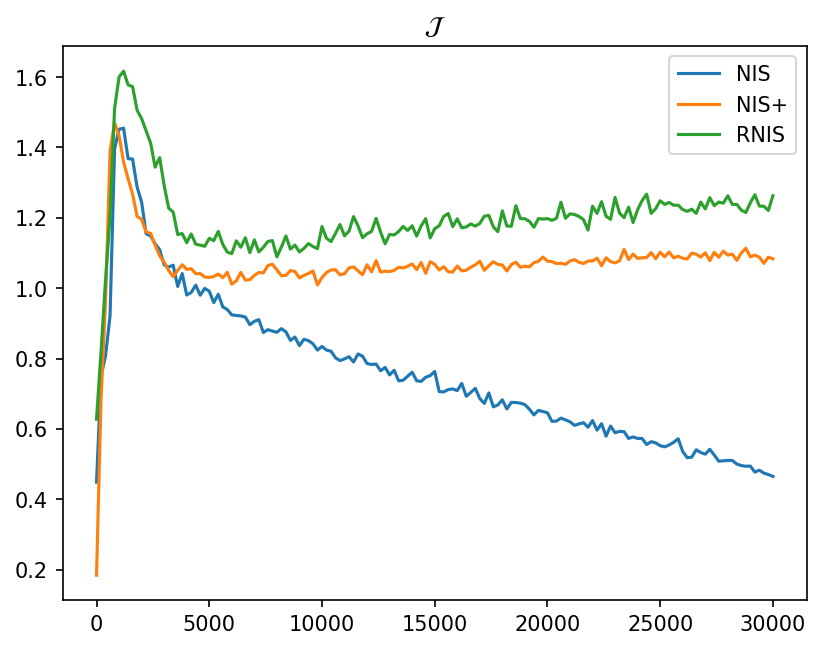

In [9]:
plt.figure(dpi=150)
timeseries = np.arange(len(trainer.eis)) * clip
plt.plot(timeseries, eis_nis, label='NIS')
plt.plot(timeseries, eis_nisp, label='NIS+')
plt.plot(timeseries, eis_rnis, label='RNIS')
plt.title(r'$\mathcal{J}$')
plt.legend()
plt.show()

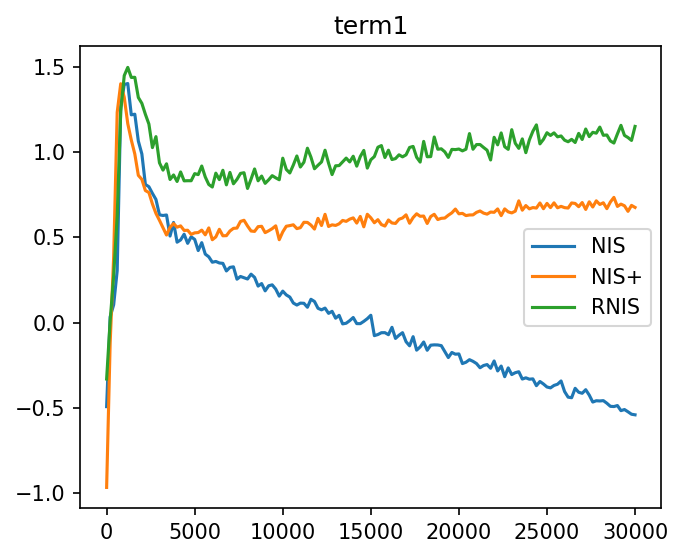

In [10]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis)) * clip
plt.plot(timeseries, term1s_nis, label='NIS')
plt.plot(timeseries, term1s_nisp, label='NIS+')
plt.plot(timeseries, term1s_rnis, label='RNIS')
plt.title(r'term1')
plt.legend()
# plt.yscale('log')
plt.show()

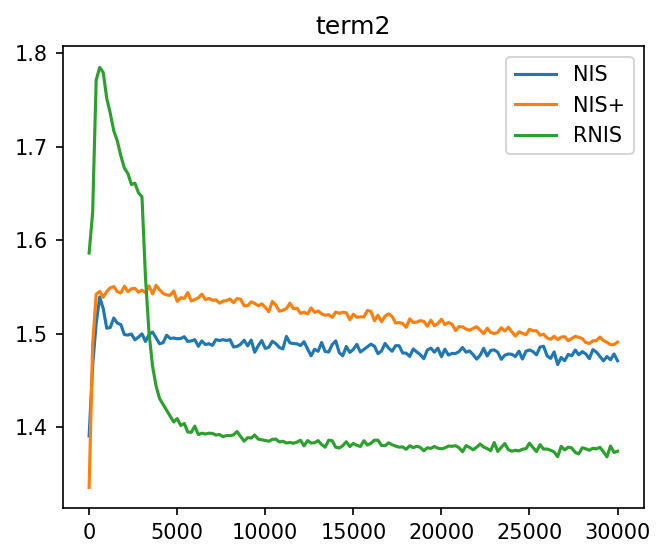

In [11]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis)) * clip
plt.plot(timeseries, term2s_nis, label='NIS')
plt.plot(timeseries, term2s_nisp, label='NIS+')
plt.plot(timeseries, term2s_rnis, label='RNIS')
plt.title(r'term2')
plt.legend()
# plt.yscale('log')
plt.show()

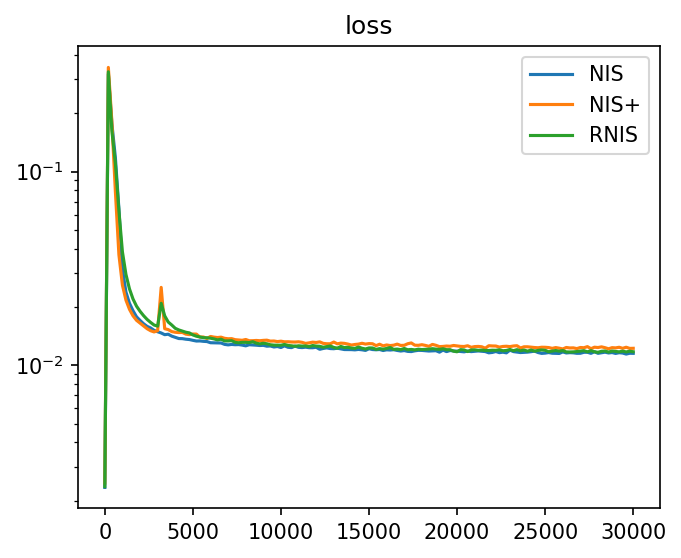

In [12]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis)) * clip
plt.plot(timeseries, losses_nis_train, label='NIS')
plt.plot(timeseries, losses_nisp_train, label='NIS+')
plt.plot(timeseries, losses_rnis_train, label='RNIS')
plt.title(r'loss')
plt.legend()
plt.yscale('log')
plt.show()

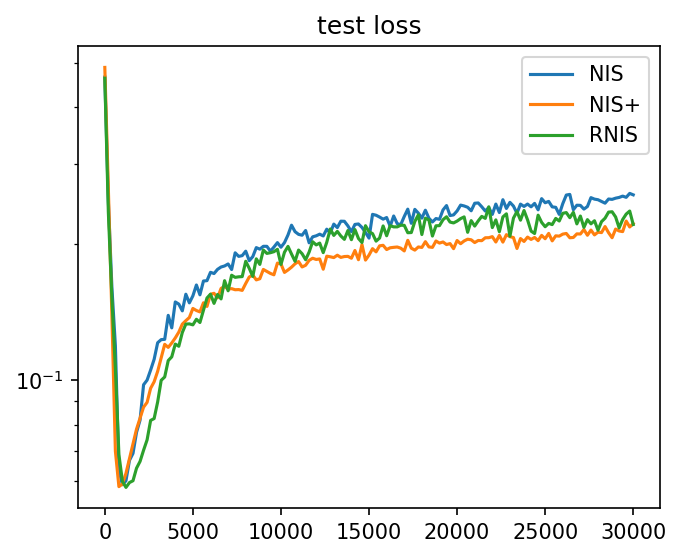

In [13]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis)) * clip
plt.plot(timeseries, losses_nis_test, label='NIS')
plt.plot(timeseries, losses_nisp_test, label='NIS+')
plt.plot(timeseries, losses_rnis_test, label='RNIS')
plt.title(r'test loss')
plt.legend()
plt.yscale('log')
plt.show()